In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. However, unlike New York, the neighborhood data is not readily available on the internet. What is interesting about the field of data science is that each project can be challenging in its unique way, so you need to learn to be agile and refine the skill to learn new libraries and tools quickly depending on the project.

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.

Your submission will be a link to your Jupyter Notebook on your Github repository


<img src="example_df.png" width=300>


<a href=https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M> WIKI </a>

    The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
    Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

    If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
    Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
    In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [103]:
import pandas
df = pandas.read_csv("toronto.csv")
df.dropna(how='any')
indexNames = df[ df['Borough '] == 'Not assigned '].index
df.drop(indexNames , inplace=True)
indexNames = df[ df['Borough '] == 'NaN'].index
df.drop(140 , inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)
df_gps = pandas.read_csv('Geospatial_Coordinates.csv')
df_gps.head()
#for index, row in df_gps.iterrows():
df_gps.to_csv("toronto_areaCodes.csv")
df.to_csv("toronto_neghborhoods.csv")
# I cleaned up a little in The Text Editor
df_ac = pandas.read_csv("toronto_areaCodes.csv")
df_nb = pandas.read_csv("toronto_neghborhoods.csv")
import pandas,sqlite3
conn = sqlite3.connect('tor2.sqlite')
df_ac.to_sql("ac",conn)
df_nb.to_sql("nb",conn)
# SELECT ac.PostalCode,Latitude,Longitude,Borough,Neighborhood FROM ac JOIN nb ON ac.PostalCode=nb.PostalCode; 
# I had problems doing that in pandas ....


,PostalCode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,Malvern / Rouge
1,M1C,43.784535,-79.160497,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,43.763573,-79.188711,Scarborough,Guildwood / Morningside / West Hill
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


In [104]:
dft = pandas.read_csv("tor_sql.csv")
dft.head()

,PostalCode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,Malvern / Rouge
1,M1C,43.784535,-79.160497,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,43.763573,-79.188711,Scarborough,Guildwood / Morningside / West Hill
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


In [114]:
import folium
m = folium.Map(
    location=[43.7153834,-79.40567840000001],
    zoom_start=10,
    tiles='Stamen Terrain'
)
for index, row in dft.iterrows():
    folium.Marker([row['Latitude'],row['Longitude'],], popup='<i> %s %s %s </i>' % (row['PostalCode'],row['Borough'],row['Neighborhood']), tooltip=row['PostalCode']).add_to(m)

m

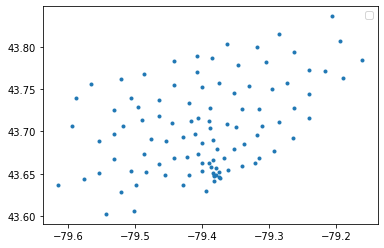

In [146]:
import matplotlib.pyplot as plt
x = []
y = []
ac = []
for index, row in dft.iterrows():
    x.append(row['Longitude'])
    y.append(row['Latitude'])
    ac.append(row['PostalCode'])
plt.legend(ac)                   
plt.plot(x,y,".")


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 2 3 0 3 3 3 1 1 1 2 0 0
 0 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 3 3 3
 3 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[-79.37416041  43.66883403]
 [-79.52478493  43.68059059]
 [-79.25682511  43.76342274]
 [-79.41377875  43.74471936]]


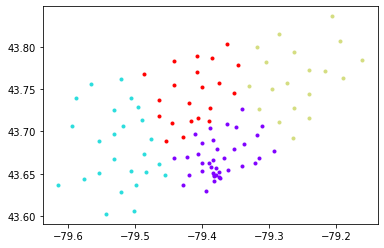

In [147]:
from sklearn.cluster import KMeans 
from matplotlib import cm
import numpy as np
xy = []
for l in zip(x,y):
    xy.append(l)
#print(xy)


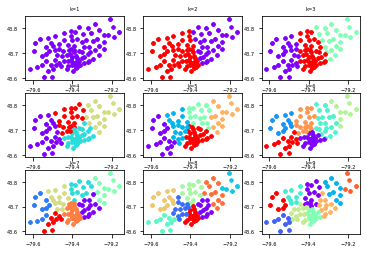

In [160]:
kmax = 9
for k in range(1,kmax+1):
    #plt.figure(figsize=(, 4))
    plt.subplot('33'+str(k))
    plt.title("k=%s" % k,fontsize=5)
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(xy)
    k_means_labels = k_means.labels_
    #print(k_means_labels)
    k_means_cluster_centers = k_means.cluster_centers_
    #print(k_means_cluster_centers)
    colors = cm.rainbow(np.linspace(0, 1, k))
    for i,(x,y) in enumerate(xy):
        c = colors[k_means_labels[i]]
        ax = plt.gca()
        for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(5)
        for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(5)
                plt.plot(x,y,'.',color=c)

In [79]:
# This works, but the results differ from the table we got from the instructors ...
import pgeocode

def findCanadianAreaCode(areaCode):
    nomi = pgeocode.Nominatim('ca')
    df_x = nomi.query_postal_code(areaCode)
    return(df_x.latitude,df_x.longitude)
print(df_gps.columns)
for pc in df_gps['Postal Code']:
    print("%s %s "% (pc,findCanadianAreaCode(pc)))
#df_gps.assign

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')
M1B (43.8113, -79.193) 
M1C (43.7878, -79.1564) 
M1E (43.7678, -79.1866) 
M1G (43.7712, -79.2144) 
M1H (43.7686, -79.2389) 
M1J (43.7464, -79.2323) 
M1K (43.7298, -79.2639) 
M1L (43.7122, -79.2843) 
M1M (43.7247, -79.2312) 
M1N (43.6952, -79.2646) 
M1P (43.7612, -79.2707) 
M1R (43.7507, -79.3003) 
M1S (43.7946, -79.2644) 
M1T (43.7812, -79.3036) 
M1V (43.8177, -79.2819) 
M1W (43.8016, -79.3216) 
M1X (43.834, -79.2069) 
M2H (43.8015, -79.3577) 
M2J (43.7801, -79.3479) 
M2K (43.7797, -79.3813) 
M2L (43.7547, -79.3764) 
M2M (43.7915, -79.4103) 
M2N (43.7673, -79.4111) 
M2P (43.75, -79.3978) 
M2R (43.7786, -79.445) 
M3A (43.7545, -79.33) 
M3B (43.745, -79.359) 
M3C (43.7334, -79.3329) 
M3H (43.7535, -79.4472) 
M3J (43.7694, -79.4921) 
M3K (43.739, -79.4692) 
M3L (43.7334, -79.5116) 
M3M (43.7319, -79.4928) 
M3N (43.7568, -79.521) 
M4A (43.7276, -79.3148) 
M4B (43.7063, -79.3094) 
M4C (43.6913, -79.3116) 
M4E (43.6784, -79.2941

In [72]:
import geocoder # import geocoder

def findGPS(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    print("yo")
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        print(g)
        lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return (latitude,longitude)

print(findGPS('M5B'))

yo
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Ge

KeyboardInterrupt: 